In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df = pd.concat([df1,df2], axis = 0)
df.set_index(np.arange(0,129880),inplace = True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.tail(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 25 columns):
Unnamed: 0                           129880 non-null int64
id                                   129880 non-null int64
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Inflight wifi service                129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Ease of Online booking               129880 non-null int64
Gate location                        129880 non-null int64
Food and drink                       129880 non-null int64
Online boarding                      129880 non-null int64
Seat comfort                         129880 non-null int64


In [5]:
df.drop(['Unnamed: 0', 'id'], axis = 'columns', inplace = True)

In [6]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [7]:
df[['Gender' ,'Class', 'Customer Type', 'Type of Travel','satisfaction']] = df[['Gender', 'Class', 'Customer Type', 'Type of Travel','satisfaction']].astype('category')

In [8]:
for col in df.iloc[:,6:20] :
    df[col] = df[col].astype('category')

In [9]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [10]:
df.describe(include = 'category')

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,2,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,65899,106100,89693,62160,32320,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969,73452


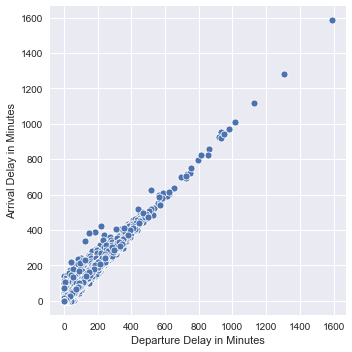

In [11]:
sns.relplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes' , data = df, kind = 'scatter')
plt.show()

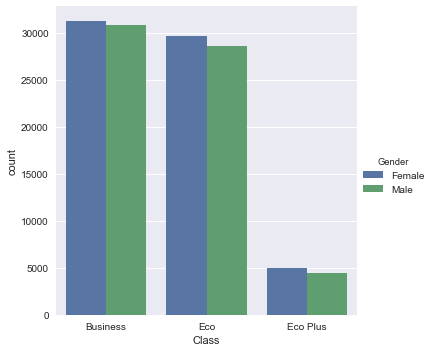

In [12]:
sns.catplot('Class', data = df, kind = 'count', hue = 'Gender')

plt.show()

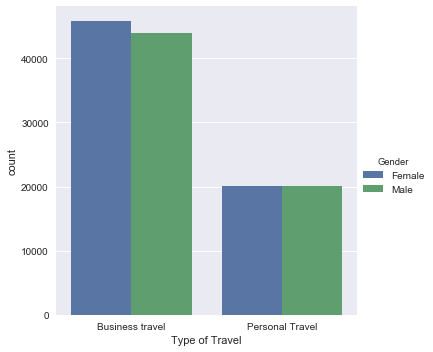

In [13]:
sns.catplot('Type of Travel', data = df, kind = 'count', hue = 'Gender')

plt.show()

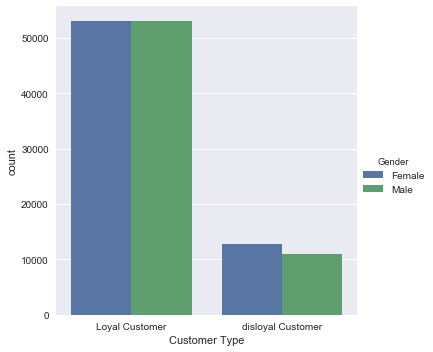

In [14]:
sns.catplot('Customer Type', data = df, kind = 'count', hue = 'Gender')

plt.show()

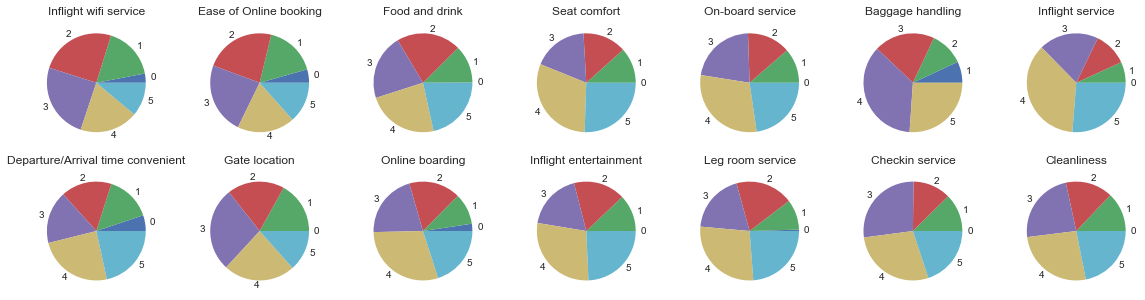

In [15]:
fig, ax = plt.subplots(2,7,figsize = (20,5))
i, j = 0, 0
for col in df.iloc[:,6:20] :
    data = df[col].value_counts().sort_index()
    lebels = data.index
    ax[i,j].pie(data.values, labels = lebels)
    ax[i,j].set_title(col)
    i += 1
    if i == 2:
        i = 0
        j+=1
plt.show()

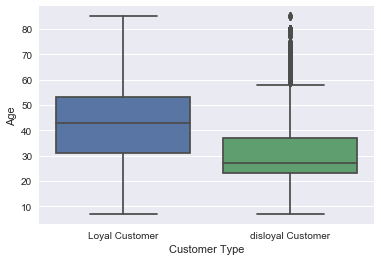

In [16]:
sns.boxplot(x = 'Customer Type',y = 'Age', data = df)
plt.show()

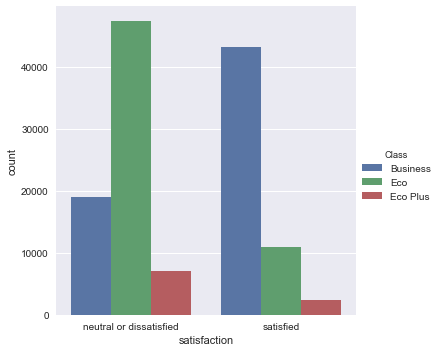

In [17]:
sns.catplot(x = 'satisfaction',data = df, kind = 'count', hue = 'Class')
plt.show()